In [1]:
## Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, AutoDateFormatter, AutoDateLocator, WeekdayLocator, MonthLocator, DayLocator, DateLocator, DateFormatter
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import datetime, calendar
#from datetime import datetime
import matplotlib.patches as mpatches
%matplotlib inline

## Import data frome pickle generated from muß ein file mit agentenstats sein
data = pd.read_pickle('/home/keuch/gits/keuch/code_box/pyt/spreadsheetparsing/entwuerfe/xls_testruns/agentenpickel.pkl')
data2=data.drop(['dt','dd','hh','tt','acw','wd','yy','ag','ht','vl','mm','an'],1)
wsplit=data2.groupby(['ww','lo','bz']).sum()

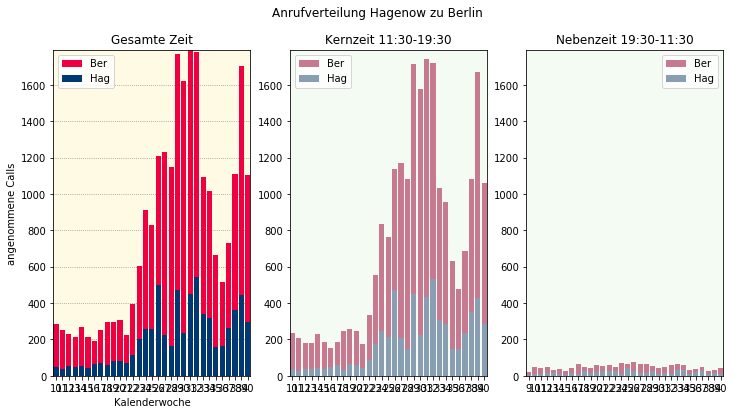

In [2]:
unstckd=wsplit.unstack().unstack()
kernzeit=unstckd['be','k']
nebenzeit=unstckd['be','n']

fig=plt.figure(figsize=(12,6))
fig.suptitle('Anrufverteilung Hagenow zu Berlin')
kzh="#003873"
kzb="#EE0042"
nzh="#899EB2"
nzb="#C7798F"

ax=fig.add_subplot(131)
ax.margins(0,0)
ax.set_facecolor('#FFFAE4')
ax.set_xticks(unstckd.index)
ax.set_title('Gesamte Zeit')
ax.set_ylabel('angenommene Calls')
ax.set_xlabel('Kalenderwoche')
ax.yaxis.grid(True, which='major', color='#8C8C8C', linestyle=':')
ax.set_axisbelow(True)
p2 = ax.bar(unstckd.index, nebenzeit['B']+kernzeit['B'], width=.8, color=kzb, bottom=nebenzeit['H']+kernzeit['H'], label="Ber")
p1 = ax.bar(unstckd.index, nebenzeit['H']+kernzeit['H'], width=.8, color=kzh, label="Hag")
maxcalls=ax.get_ylim()

ax2=fig.add_subplot(132)
ax2.margins(0,0)
ax2.set_facecolor('#F4FBF3')
ax2.set_xticks(unstckd.index)
ax2.set_title('Kernzeit 11:30-19:30')
ax2.set_ylim(maxcalls)
p2 = ax2.bar(unstckd.index, kernzeit['B'], width=.8, color=nzb, bottom=kernzeit['H'], label="Ber")
p1 = ax2.bar(unstckd.index, kernzeit['H'], width=.8, color=nzh, label="Hag")

ax3=fig.add_subplot(133)
ax3.margins(0,0)
ax3.set_facecolor('#F4FBF3')
ax3.set_xticks(unstckd.index)
ax3.set_title('Nebenzeit 19:30-11:30')
ax3.set_ylim(maxcalls)
p2 = ax3.bar(unstckd.index, nebenzeit['B'], width=.8, color=nzb, bottom=nebenzeit['H'], label="Ber")
p1 = ax3.bar(unstckd.index, nebenzeit['H'], width=.8, color=nzh, label="Hag")

ax.legend()
ax2.legend()
ax3.legend()

In [3]:
# Hier wird ein df erzeugt, der die einzelnen Zeiten als obere Ebene zusammenfasst, und darunter die Agenten
# namen der Spalten wie folgt:
# an=angenommene Anrufe, be=bearbeitete Anrufe, vl=verlorene Anrufe, tt=talktime absolut, acw=nacharbeit absolut
# zusätzlich, berechnet:ht=gesamtarbeitszeit (tt+acw), jeweils, aht att acw = durchschnitt (ht,tt,acw/be)

colfunx={'tt':'sum','acw':'sum','be':'sum','vl':'sum','an':'sum'}
monate=data.groupby(['mm','ag']).agg(colfunx)
monate['ht']=monate.tt+monate.acw
monate['att']=monate['tt']/monate.be
monate['aacw']=monate['acw']/monate.be
monate['aht']=monate['ht']/monate.be
ustck=monate.unstack()

alleagenten=monate.reset_index().groupby('mm')[['acw','tt','ht','be']].sum()
alleagenten['aht']=alleagenten['ht']/alleagenten['be']
alleagenten['att']=alleagenten['tt']/alleagenten['be']
alleagenten['aacw']=alleagenten['acw']/alleagenten['be']
alleagenten


ustck.loc[:,('be','alle')]=alleagenten['be']
ustck.loc[:,('aht','alle')]=alleagenten['aht']
ustck.loc[:,('att','alle')]=alleagenten['att']
ustck.loc[:,('aacw','alle')]=alleagenten['aacw']


In [4]:
#ttmonatl(ustck,'gesinst')
#ustck.loc[7]['be']

In [5]:
data.loc['2017-08'].head()

dt    yy       tt bz hh dd     acw mm  \
2017-08-01 07:00:00 dehnsil  2017-08-01  2017   0.4333  n  7  1     0.1  8   
                    radtkke  2017-08-01  2017   0.9833  n  7  1       2  8   
2017-08-01 08:00:00 dehnsil  2017-08-01  2017    35.65  k  8  1  5.2667  8   
                    diessro  2017-08-01  2017  15.8833  k  8  1       8  8   
                    neumath  2017-08-01  2017  35.8333  k  8  1     5.1  8   

                             ww   wd lo       ag an be vl       ht  
2017-08-01 07:00:00 dehnsil  31  Tue  H  dehnsil  1  1  0   0.5333  
                    radtkke  31  Tue  H  radtkke  2  2  0   2.9833  
2017-08-01 08:00:00 dehnsil  31  Tue  H  dehnsil  8  8  0  40.9167  
                    diessro  31  Tue  B  diessro  8  8  0  23.8833  
                    neumath  31  Tue  B  neumath  6  6  0  40.9333

In [6]:
stg=datetime.date(year=2017,month=5,day=5)
#data.loc[('2017-08','dehnsil'),:]
data.loc['2017-09','an'].sum()

4212.0

**SUMME KW14 = SUMME AGENTENAUSWERTUNG STIMMT MIT SUMME HOTLINE ÜBEREIN**
**SUMME KW8: AGENTEN 19 WENIGER ALS HOTLINE. AGENTEN FEHLEN?**

In [7]:
#data.be

In [10]:
def ttmonatl(frame,agent):
    fig=plt.figure(figsize=(6,4))
    fig.suptitle('talk- und handlingtimes '+agent)
    aht="#003873"
    aacw="#EE0042"
    att="#899EB2"
    nzb="#C7798F"

    ax=fig.add_subplot(111)
    ax.margins(0,0)
    ax.set_xlabel('Monat')
    ax.set_ylabel('Minuten')
    ax.set_xticks(ustck.index)
    ax.set_ylim(0,10)
    ax.axhline(y=3.5,color=nzb,ls='--',alpha=0.6, label='3:30min')
    htime=ax.plot(frame.index,ustck['aht',agent],color=aht,label='aht')
    ttime=ax.plot(frame.index,ustck['att',agent],color=att,label='att')
    wtime=ax.plot(frame.index,ustck['aacw',agent],color=aacw,label='aacw')
    #for mon in htime:
    #    xpos=mon.get_xdata()
    #    heig=mon.get_ydata()
    #    for coord in xpos:
    #        calls=frame['be',agent].values[coord-2]
    #        note=ax.text(coord,ax.get_ylim()[1], s=str(int(calls)),ha='center')

    ax.legend()
    
    #### only for showing the y values
    print(ustck['aht',agent])

mm
3     3.340637
4     3.526616
5     3.456884
6     3.620265
7     3.838869
8     3.997685
9     3.987720
10    4.029713
Name: (aht, alle), dtype: float64


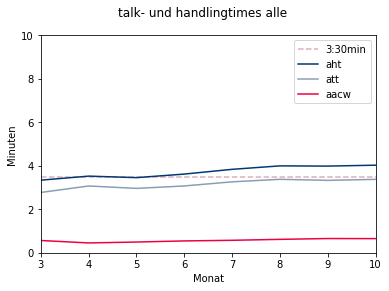

In [11]:
ttmonatl(ustck,'alle')

In [12]:
ustck.head()

vl                                                          \
ag Gesing Carexpert Papke Carexpert Stanz Carexpert beckeca beckesi beckfra   
mm                                                                            
3               0.0             0.0             0.0     0.0     0.0     0.0   
4               NaN             NaN             NaN     0.0     0.0     0.0   
5               NaN             NaN             NaN     0.0     0.0     0.0   
6               NaN             NaN             NaN     0.0     0.0     0.0   
7               NaN             NaN             NaN     0.0     0.0     0.0   

                                      ...          aht                    \
ag bretsal dehnsil diessro gesinst    ...      stanzju stanzju Carexpert   
mm                                    ...                                  
3      0.0     0.0     0.0     0.0    ...          NaN          4.476660   
4      0.0     1.0     0.0     0.0    ...     5.083333          3.223412   
5      0.0     0.0     0.0     1.0    ...     2.740000          4.350699   
6      0.0     0.0     0.0    12.0    ...          NaN          4.175805   
7      0.0     0.0     0.0     0.0    ...          NaN          3.816209   

                                              be       aht       att      aacw  
ag steffci   strausi   tetzlva   tonnroy    alle      alle      alle      alle  
mm                                                                              
3      NaN  2.801660  1.968383       NaN   988.0  3.340637  2.774965  0.565672  
4      NaN  4.563537  1.101505       NaN   943.0  3.526616  3.072640  0.453976  
5      NaN  2.011108  2.217341       NaN  1329.0  3.456884  2.961725  0.495160  
6      NaN  4.126392  2.420421       NaN  3715.0  3.620265  3.074230  0.546034  
7      NaN  4.690475  2.139073  4.109286  6214.0  3.838869  3.263926  0.574944  

[5 rows x 328 columns]

In [31]:
data.head()

dt    yy      tt bz  hh dd        acw mm  \
2017-03-04 08:00:00 beckfra  2017-03-04  2017  2.1333  n   8  4     0.2334  3   
                    tetzlva  2017-03-04  2017  2.6167  n   8  4  0.0666001  3   
2017-03-04 09:00:00 tetzlva  2017-03-04  2017  0.9167  n   9  4     0.1333  3   
2017-03-04 10:00:00 scholan  2017-03-04  2017     0.6  n  10  4        1.5  3   
2017-03-04 11:00:00 beckfra  2017-03-04  2017  4.2333  n  11  4  0.0999999  3   

                            ww   wd lo       ag an be vl      ht  
2017-03-04 08:00:00 beckfra  9  Sat  H  beckfra  1  1  0  2.3667  
                    tetzlva  9  Sat  B  tetzlva  1  1  0  2.6833  
2017-03-04 09:00:00 tetzlva  9  Sat  B  tetzlva  2  2  0    1.05  
2017-03-04 10:00:00 scholan  9  Sat  H  scholan  1  1  0     2.1  
2017-03-04 11:00:00 beckfra  9  Sat  H  beckfra  1  1  0  4.3333